In [4]:
import os
import re
import statistics
import pandas as pd

In [5]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)

In [6]:
df = pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet'))

In [7]:
sloupce = ['leader']

In [8]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [9]:
df = df.explode('008')

In [10]:
df = df[(df["008"].str[15:17] == "xr") & (df["008"].str[35:38] == "cze")]

In [11]:
df = df.explode("leader")

In [12]:
df = df[df["leader"].str[6].isin(["a", "t"])]

In [13]:
df = df[~df["leader"].str[7].isin(["b", "i", "s", " "])]

In [14]:
sloupce = ['245','655','072','100','041','964','080']

In [15]:
for s in sloupce:
    pripojit = pd.read_parquet(os.path.join("data/cnb_sloupce",f"{s}.parquet"))
    df = df.merge(pripojit, left_index=True, right_index=True, how="left")

In [16]:
def najdi_rok(nn8):
    if nn8[6] in ['s', 't', 'd', 'm', 'e', 'c','u', 'r']:
        try:
            return int(nn8[7:11])
        except Exception as e:
            return None
        else:
            return None
    elif nn8[6] == 'q':
        try:
            rok1 = int(nn8[7:11])
            rok2 = int(nn8[11:15])
            if rok2 - rok1 <= 5:
                return int(statistics.median([rok1, rok2]))
            else:
                return None
        except:
            return None
    else:
        return None

In [17]:
def r(x):
    return x.groupby('rok').size().plot.bar(figsize=(25,5))

In [18]:
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))

In [19]:
df = df.dropna(subset=["rok"])

In [20]:
df['rok']

001
ck8300078         1982.0
ck8300080         1983.0
ck8300081         1982.0
ck8300082         1981.0
ck8300083         1982.0
                   ...  
nkc20243632921    2024.0
nkc20243632922    2024.0
nkc20243632923    2024.0
nkc20243632924    2024.0
cpk20243632941    1953.0
Name: rok, Length: 881825, dtype: float64

In [59]:
df = df.dropna(subset=['245_a','100_a'])
df['titul'] = df['245_a'].apply(lambda x: x[:-1].strip() if x[-1] in [':','/',';','=','.'] else x.strip())

In [22]:
df = df.sort_values(by="rok")

In [23]:
df[df['100_7'].astype(str).str.contains('jk01072915',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20041417516,040923s1836 xr e 000 p cze,nam a22 a 4500,1,0,Mág :,báseň od Karla Hynka Máchy,None,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[821.162.3-1],[MRF],None,None,None,1836.0,Mág
cpk20051497973,050128s1845 xr e 000 macze,nam a22 a 4500,1,0,Básně.,None,[napsal Karel Hynek Mácha],[Díl první /],None,None,None,None,None,"[7, 7, 7, 7, 7]","[česká poezie, studie, deníky, korespondence, ...","[fd133958, fd133597, fd132006, fd132681, fd133...","[czenas, czenas, czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[929, 821.162.3-051, 821.162.3-1, (048.8), (09...","[MRF, MRF, MRF, MRF, MRF, MRF, MRF]",None,None,None,1845.0,Básně.
cpk20142538381,140106s1857 xr ||| | cze,nam a22 a 4500,1,0,Cikáni /,None,román z pozůstalých spisů Karla Hynka Máchy,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1857.0,Cikáni
cpk20132508470,131021s1862 xr e 000 p cze,nam a22 aa4500,1,0,Spisy Karla Hynka Máchy,None,None,None,None,None,None,None,None,"[7, 7, 7]","[poezie, české romány, české povídky]","[fd131936, fd133974, fd133971]","[czenas, czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-31, 821.162.3-32, (0:82-31), (0:82-...","[MRF, MRF, MRF, MRF]",None,None,None,1862.0,Spisy Karla Hynka Máchy
cpk20040315951,040512q18651866xr a e 000 p cze,nam a22 a 4500,1,0,Máj /,None,báseň romantická od Karla Hynka Máchy ; illust...,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1865.0,Máj
nkc20081815810,080814s1869 xr e 000 j cze,nam a22 a 4500,1,0,Cikáni /,None,K.H. Mácha ... ; [autografoval Adolf Hanel],None,None,None,None,None,None,[7],[české prózy],[fd133972],[czenas],None,None,None,None,[7],[821.162.3-3],[Česká próza],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-3, (0:82-3)]","[MRF, MRF]",None,None,None,1869.0,Cikáni
nkc20081815811,080814s1869 xr e 000 p cze,nam a22 a 4500,1,0,Spisy K.H. Máchy /,None,... [autografoval Adolf Hanel],None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Mácha, Karel Hynek,",jk01072915,[aut],1810-1836,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1869.0,Spisy K.H. Máchy
cpk20021037313,020117s1872 xr a e 000 p cze,nam a22 a 4500,1,0,Máj :,báseň romantická od Karla Hynka Máchy /,ilustroval Jos. Scheiwl ; ryl J.F. Patočka,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None

In [24]:
df[df['titul'] == 'Šokovaná růže']

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196904868,971206s1969 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1969.0,Šokovaná růže
bk197002645,970502s1970 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1970.0,Šokovaná růže


In [25]:
df[df['072_x'].astype(str).str.lower().str.lower().str.contains('verše',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [26]:
df[df['072_x'].astype(str).str.lower().str.contains('česká poezie',na=False)]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
cpk20051527410,050317s1802 xr e 000 pdcze,nam a22 a 4500,1,0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",na důkaz wážnosti a ssetrnosti obětowána od F....,None,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],0,"S...a, F.",None,[aut],None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[821.162.3-1],[MRF],None,None,None,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ..."
bknvla04792,041025s1802 xr e 000 p cze,nam a22 1i 4500,1,0,Nowé básně.,None,wydané od Antonjna Puchmayera,[Swazek prwnj /],None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Puchmajer, Antonín Jaroslav,",jk01101689,[aut],1769-1820,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1802.0,Nowé básně.
nkc20061639418,060123s1803 xr e 000 p cze,nam a22 a 4500,1,0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,cýsařsko-králowskému Hornjmu Auřadu obětowaný ...,složený od Frantisska Wawáka ; a w hudbu čtyřh...,None,None,None,None,None,None,"[7, 7]","[česká poezie, jubilejní publikace]","[fd133958, fd131839]","[czenas, czenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Vavák, František Jan,",jk01141705,[aut],1741-1816,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (437.312), (082.2)]","[MRF, MRF, MRF]",None,None,None,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...
cpk20051500789,050222s1804 xr e 000 pdcze,nam a22 a 4500,1,0,[Přehrozné se mračno hnalo ... /,None,František Jan Tomsa],None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Tomsa, František Jan,",jk01132744,[aut],1753-1814,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, 929.7-055.2, (437.3)]","[MRF, MRF, MRF]",None,None,None,1804.0,[Přehrozné se mračno hnalo ...
bknhak08849,030503s1804 xr e 000 p cze,nam a22 1 4500,1,0,Poslednj Saud /,None,složený od Wogtěcha Negedlého,None,None,None,None,None,None,[7],[česká poezie],[fd133958],[czenas],None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Nejedlý, Vojtěch,",jk01082969,[aut],1772-1844,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, (0:82-1)]","[MRF, MRF]",None,None,None,1804.0,Poslednj Saud
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243603307,240426s2024 xr a g 000 p cze,nam a22 i 4500,1,0,Každý má co říct /,None,"Anežka Popelová, Tomáš Halata, Klára Vyvialová...",None,None,None,None,None,None,"[7, 7, 9, 9]","[česká poezie, fotografické publikace, Czech p...","[fd133958, fd132276, None, None]","[czenas, czenas, eczenas, eczenas]",None,None,None,None,[7],[821.162.3-1],[Česká poezie],[Konspekt],[25],1,"Popelová, Anežka",None,"[aut, pht]",None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[821.162.3-1, 808.1-053.2, (437.326), (0:82-1)...","[MRF, MRF, MRF, MRF, MRF]",None,None,None,2024.0,Každý má co říct
nkc20243603296,240425s2024 xr a g 000 p cze,nam a22 i 4500,1,0,Na lačný srce - Suché sny ryb /,None,Roman Krištof ; ilustrace Frída 

In [27]:
ceska_poezie = df[
    df['072_x'].astype(str).str.lower().str.contains('česká poezie',na=False)
    | df['072_a'].astype(str).str.lower().str.contains('821.162.3-1',na=False)
    | df['080_a'].astype(str).str.contains('821.162.3-1',na=False)
    | df['080_a'].astype(str).str.contains('885-14',na=False)
    | df['655_a'].astype(str).str.lower().str.contains('česká poezie', na=False)
    
]
ceska_poezie = ceska_poezie[ceska_poezie['100_a'].notnull()]
ceska_poezie['autorstvo'] = ceska_poezie['100_a'].apply(lambda x: x.replace(',','') if x != None else None)
ceska_poezie['autorstvo_kod'] = ceska_poezie['100_7'].apply(lambda x: x[0] if x != None else None)
ceska_poezie2 = ceska_poezie.sort_values(by='rok').drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [28]:
ceska_poezie2[ceska_poezie2['rok'] < 1915][['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
cpk20031278262,1884.0,Z doby táborů,Stašek Antal,j
cpk20021191015,1886.0,Obrázky veršem,Rais Karel Václav,j
bknaus00518,1886.0,Zevrubné dějiny českého písemnictví doby nové.,Bačkovský František,j
cpk20021064166,1885.0,Nové básně Emanuela Miřiovského,Miřiovský Emanuel,j
cpk20021094640,1878.0,Malý vyprávěč,Bačkora Štěpán,j
cpk20021186015,1897.0,Na nábřeží,Maternová Pavla,j
bknaus00605,1896.0,Vytržené listy,Babánek Karel,j
nkc20081808413,1899.0,Rosa a jíní,Heyduk Adolf,j
bknmik09940,1899.0,Rozehrané strunky,Sokolová Vilma,j


In [29]:
df[df['245_a'].astype(str).str.contains('Šokovaná růže')]

,008,leader,245_ind1,245_ind2,245_a,245_b,245_c,245_n,245_p,245_h,245_f,245_s,245_v,655_ind2,655_a,655_7,655_2,655_ind1,655_x,655_z,655_y,072_ind2,072_a,072_x,072_2,072_9,100_ind1,100_a,100_7,100_4,100_d,100_q,100_c,100_b,100_e,041_ind1,041_a,041_h,041_b,041_k,041_g,041_f,041_d,041_e,041_j,041_n,041_ind2,041_c,041_m,964_a,080_a,080_2,080_x,080_9,080_ind1,rok,titul
001,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
bk196904868,971206s1969 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1969.0,Šokovaná růže
bk197002645,970502s1970 xr ||| | cze,nam a22 1 4500,1,0,Šokovaná růže /,None,Oldřich Mikulášek,None,None,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,"Mikulášek, Oldřich,",jk01081628,[aut],1910-1985,None,None,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[885-14],[undef],None,None,None,1970.0,Šokovaná růže


In [30]:
ceska_poezie2[ceska_poezie2['autorstvo'] == 'Skácel Jan'][['rok','titul','autorstvo','autorstvo_kod']]

,rok,titul,autorstvo,autorstvo_kod
001,,,,
bk515500222,1955.0,Kaštany padají,Skácel Jan,j
bk195703911,1957.0,Kolik příležitostí má růže,Skácel Jan,j
bk196003510,1960.0,Co zbylo z anděla,Skácel Jan,j
bk196101204,1961.0,Jak šel brousek na vandr,Skácel Jan,j
bk196101329,1961.0,Pohádka o velikém samovaru,Skácel Jan,j
bk196204607,1962.0,Hodina mezi psem a vlkem,Skácel Jan,j
bk196500660,1964.0,Návraty,Skácel Jan,j
bk196503453,1965.0,Smuténka,Skácel Jan,j
bk196605103,1966.0,Český brevíř lásky,Skácel Jan,j


In [31]:
ceska_poezie2[ceska_poezie2['autorstvo'] == 'Mikulášek Oldřich'][['rok','titul','autorstvo','autorstvo_kod']]

,rok,titul,autorstvo,autorstvo_kod
001,,,,
bk194002378,1940.0,Marné milování,Mikulášek Oldřich,j
bk515500200,1955.0,Divoké kačeny,Mikulášek Oldřich,j
bk195703907,1957.0,Krajem táhne prašivec,Mikulášek Oldřich,j
cpk20132499416,1958.0,Taneční fantasie,Mikulášek Oldřich,j
bk196000331,1959.0,Běžící luna,Mikulášek Oldřich,j
bk195906151,1959.0,První obrázky,Mikulášek Oldřich,j
bk195902679,1959.0,Ortely a milosti,Mikulášek Oldřich,j
bk196002591,1960.0,Orchestr v korunách,Mikulášek Oldřich,j
bk196303817,1963.0,Svlékání hadů,Mikulášek Oldřich,j


In [32]:
ceska_poezie2[['rok','titul','autorstvo','autorstvo_kod']].sample(20)

,rok,titul,autorstvo,autorstvo_kod
001,,,,
bk194004448,1940.0,"Gazda Jura Vašut, pán na Čartáku",Vašut Jura,None
nkc20132508152,2013.0,Dům uprostřed týdne,Kratochvílová Pykalová Zuzana,j
nkc20112194777,2010.0,Město s hudbou pramenů,Podlipná-Stiborová Věra,k
cpk20041287550,2003.0,Bělomorka,Malijevský Igor,j
nkc20102114908,2010.0,Kruhová obrana přítomnosti,Bok John,j
nkc20081807793,2008.0,Jed v růži,Janovic Vladimír,j
nkc20132466004,2013.0,Střípky a vzpomínky,Horská Yvonna,o
nkc20203230646,2020.0,Pitný režim,Kolář Stanislav,j
cpk19970278999,1989.0,Čtyřverší,Skácel Jan,j


<Axes: xlabel='rok'>

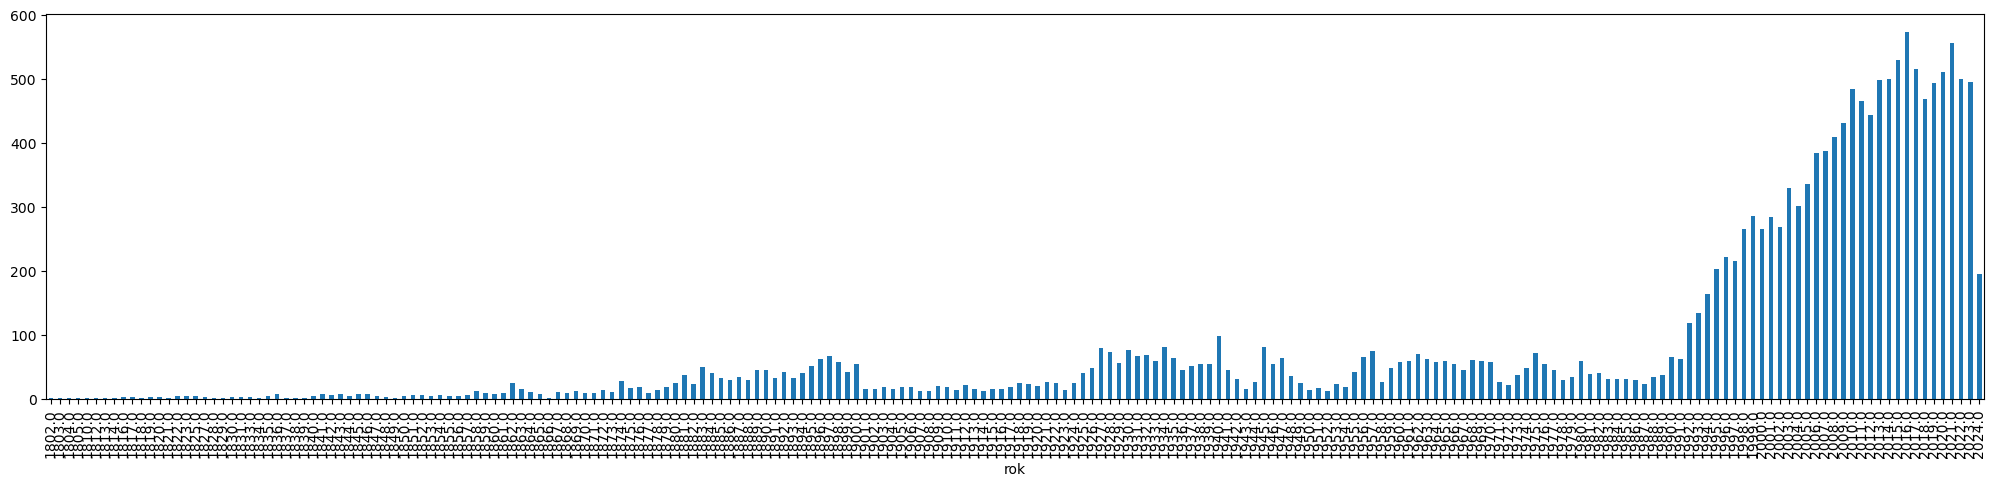

In [33]:
r(ceska_poezie2)

In [34]:
len(ceska_poezie2)

17245

In [35]:
ceska_poezie2[['rok','titul','autorstvo','autorstvo_kod']].to_parquet(os.path.join("data","cnb_ceska_poezie.parquet"))